# Sentiment analysis with the perceptron algorithm

### Importing the necessary packages

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/perceptron_algorithm

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 259, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 259 (delta 2), reused 5 (delta 1), pack-reused 252
Receiving objects: 100% (259/259), 41.18 MiB | 8.38 MiB/s, done.
Resolving deltas: 100% (125/125), done.
Updating files: 100% (51/51), done.
/content/machine_learning_1/perceptron_algorithm


In [2]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [3]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

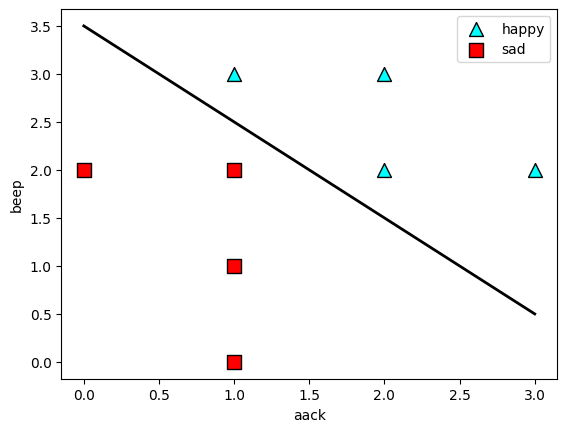

In [35]:
# Plotting the points
utils.plot_points(features, labels)

# Uncomment the following line to see a good line fit for this data.
utils.draw_line(1,1,-3.5)

### Coding the perceptron trick

In [41]:
def step(x):
    ## TODO ##
    if x > 0:
        output = 1
    else:
        output = 0
    # implement step function

    return output

def score(weights, bias, features):
    ## TODO ##
    output=np.dot(weights,  features)+bias
    # implement score calculation

    return output

def prediction(weights, bias, features):
    ## TODO ##
    output=step(score(weights, bias, features))
    # implement prediction calculation using step and score functions

    return output

def error(weights, bias, features, label):
    ## TODO ##
    pred = prediction(weights, bias, features)

    output = label - pred

    # implement error calculation using prediction and score functions
    return output

def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

In [42]:
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    ## TODO ##
    err = error(weights, bias, features, label)
    weights = weights + learning_rate * err *features
    bias = bias + learning_rate * err
    # update the weights and bias using a single data sample

    return weights, bias

### Running the perceptron algorithm

In [63]:
random.seed(0)
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    ## TODO ##
    for epoch in range(epochs):
      s = random.randint(0, len(features) - 1)
      x_s = features[s]
      y_s = labels[s]
      weights, bias = perceptron_trick(weights, bias, x_s, y_s, learning_rate)
      # errors=+error(weights, bias,  x_s, y_s)
      error_count =+error(weights, bias,  x_s, y_s)
      errors.append(error_count)
    # for this number of epochs
    # get a random datasample of our dataset(x,y)
    # using the selected datasample use perceptron_trick update weights and bias

    utils.draw_line(weights[0], weights[1], bias)
    utils.plot_points(features, labels)
    plt.ylim([-2, 5])
    plt.show()
    plt.scatter(range(epochs), errors)
    return weights, bias

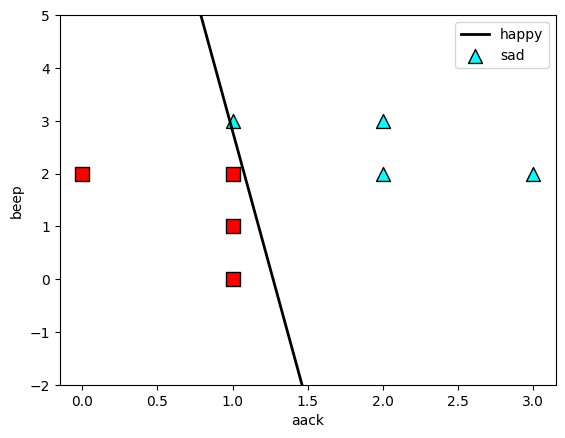

(array([0.52, 0.05]), -0.6600000000000004)

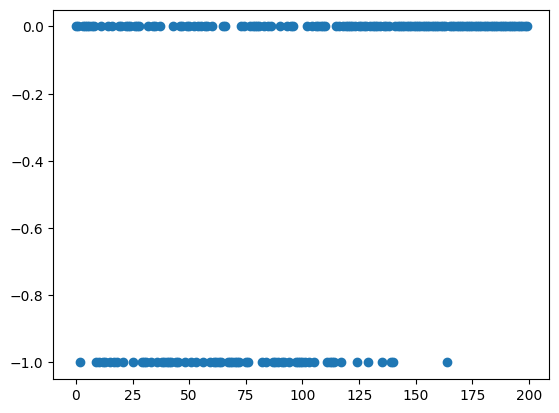

In [64]:
perceptron_algorithm(features, labels)

### The perceptron algorithm using SKlearn

In [19]:
from sklearn.linear_model import Perceptron
## TODO ##
clf = Perceptron(max_iter=200, eta0=0.01, random_state=0)
clf.fit(features, labels)
# Use SKlearn to train perceptron algorithm


Perceptron(eta0=0.01, max_iter=200)

In [20]:
clf.score(features, labels)

1.0

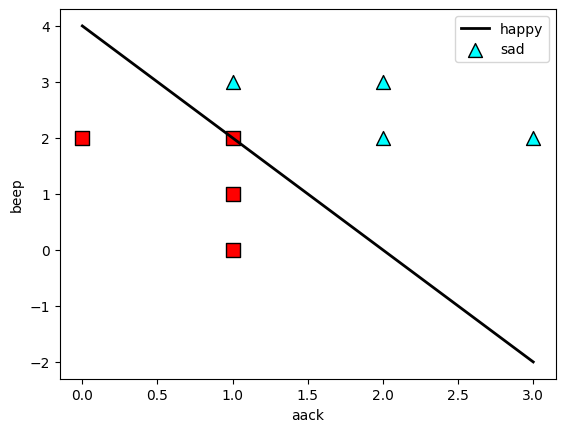

In [21]:
weights = clf.coef_
bias = clf.intercept_
utils.draw_line(weights[0][0], weights[0][1], bias)
utils.plot_points(features, labels)
plt.show()